# Open Weather Map API Challenge
Visualization of weather changes approaching the equator using random coordinates of over 600 cities around the world

## Analysis
1. The Latitude vs Temperature Plot clearly shows temperatures rise as you get closer to the equator. 
2. Temperatures rising as you get closer to the equator does not mean that the cities along the equator are the hottest. In fact, the hottest cities are just north of the equator.
3. There is no trend between distance from equator and humidity, cloudiness, or wind speed.

#### Dependencies and Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime as dt
import openweathermapy as owm
from config import api_key
from citipy import citipy

#### Generate Random Cities

In [2]:
# Create empty lists
lats = []
longs = []
coords = []
cities = []

# stop random from resetting
# np.random.seed(125)

# get latitudes and longitudes
for lat in np.random.randint(-90,90,700):
    lats.append(lat)
for long in np.random.randint(-180,180,700):
    longs.append(long)

# zip together
coords = zip(lats, longs)

# Identify nearest city for each coordinate and append the city_name/country_code to 
for lat,long in coords:
    city = citipy.nearest_city(lat,long)
    if city not in cities:
        cities.append(city.city_name)

# Print the city count to confirm sufficient count
print(f"You have generated {len(cities)} cities.")

You have generated 700 cities.


#### Perform API Calls

In [3]:
# make lists for data to be put into
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []

# count of records
record = 1

# basic url with api_key and proper units
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=Imperial&q="

In [4]:
# Process print log
print("Beginning Data Retrieval\n" + "-"*30)

for each_city in cities:
    try:
        owm_response = requests.get(url+each_city).json()
        city_record = owm_response["name"]
        print(f"Processing Record {record} | {city_record}")
        city_name.append(owm_response["name"])
        cloudiness.append(owm_response["clouds"]["all"])
        country.append(owm_response["sys"]["country"])
        date.append(owm_response["dt"])
        humidity.append(owm_response["main"]["humidity"])
        lat.append(owm_response["coord"]["lat"])
        long.append(owm_response["coord"]["lon"])
        max_temp.append(owm_response["main"]["temp_max"])
        wind_speed.append(owm_response["wind"]["speed"])
    
        record += 1
        time.sleep(1.01)
        
    except Exception as e:
        print("City not found. Skipping...")
        
print("-"*30 + "\nData Retrieval Complete\n" + "-"*30)

Beginning Data Retrieval
------------------------------
Processing Record 1 | Cape Town
Processing Record 2 | Yarensk
Processing Record 3 | Rikitea
Processing Record 4 | Rikitea
Processing Record 5 | Bereda
Processing Record 6 | Vaini
Processing Record 7 | Hilo
Processing Record 8 | Leeton
Processing Record 9 | Gao
Processing Record 10 | Maragogi
Processing Record 11 | Albany
City not found. Skipping...
Processing Record 12 | Pacific Grove
Processing Record 13 | Busselton
Processing Record 14 | Kapaa
Processing Record 15 | Ushuaia
Processing Record 16 | Srednekolymsk
City not found. Skipping...
Processing Record 17 | Albany
Processing Record 18 | Chuy
City not found. Skipping...
Processing Record 19 | Tumaco
City not found. Skipping...
Processing Record 20 | Port Elizabeth
Processing Record 21 | Busselton
Processing Record 22 | Qaanaaq
Processing Record 23 | San Patricio
Processing Record 24 | Hanzhong
Processing Record 25 | Muros
Processing Record 26 | Kedougou
Processing Record 27 | 

Processing Record 229 | Kingston
Processing Record 230 | Kapaa
Processing Record 231 | Cockburn Town
Processing Record 232 | Ahipara
Processing Record 233 | Elat
Processing Record 234 | Atuona
Processing Record 235 | Albany
Processing Record 236 | Yenagoa
Processing Record 237 | Whitehorse
Processing Record 238 | Esperance
Processing Record 239 | Cervo
Processing Record 240 | Thompson
Processing Record 241 | Caravelas
City not found. Skipping...
City not found. Skipping...
Processing Record 242 | Hilo
City not found. Skipping...
Processing Record 243 | Nishihara
Processing Record 244 | Portland
Processing Record 245 | Thompson
Processing Record 246 | Cape Town
City not found. Skipping...
City not found. Skipping...
Processing Record 247 | Hithadhoo
Processing Record 248 | Yarada
Processing Record 249 | Libenge
Processing Record 250 | Las Tunas
Processing Record 251 | Ancud
Processing Record 252 | Chokurdakh
Processing Record 253 | Upernavik
Processing Record 254 | Fitionesti
Processing

Processing Record 454 | Vaini
Processing Record 455 | Hobart
Processing Record 456 | Sao Filipe
Processing Record 457 | Mahebourg
Processing Record 458 | Thyolo
Processing Record 459 | Hilo
Processing Record 460 | Busselton
Processing Record 461 | Jacareacanga
City not found. Skipping...
Processing Record 462 | Mar del Plata
Processing Record 463 | Port Alfred
Processing Record 464 | Srednekolymsk
Processing Record 465 | Ulladulla
Processing Record 466 | Atuona
Processing Record 467 | Sambava
Processing Record 468 | Bam
Processing Record 469 | Iqaluit
Processing Record 470 | Busselton
Processing Record 471 | Tengzhou
Processing Record 472 | Rikitea
Processing Record 473 | Provideniya
Processing Record 474 | Vaini
Processing Record 475 | Sungairaya
Processing Record 476 | Kalabo
Processing Record 477 | Flin Flon
Processing Record 478 | Ahuimanu
Processing Record 479 | Amarpur
Processing Record 480 | Tawau
Processing Record 481 | Alta Floresta
Processing Record 482 | Kahului
Processing R

#### Make Data Frame, Display, and Export

In [5]:
# Create empty data frame to fill in after API calls
df = pd.DataFrame({"City": city_name, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity,
                   "Latitude": lat, "Longitude": long, "Max Temp (\u00b0F)": max_temp, "Wind Speed": wind_speed})
df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp (°F),Wind Speed
0,Cape Town,0,ZA,1561489203,71,-33.93,18.42,59.00,11.41
1,Yarensk,3,RU,1561489809,69,62.17,49.09,46.13,2.95
2,Rikitea,20,PF,1561489499,83,-23.12,-134.97,72.05,11.05
3,Rikitea,20,PF,1561489499,83,-23.12,-134.97,72.05,11.05
4,Bereda,0,ES,1561489813,64,43.27,-7.54,69.01,4.70


In [6]:
# Display county summary
df.count()

City             632
Cloudiness       632
Country          632
Date             632
Humidity         632
Latitude         632
Longitude        632
Max Temp (°F)    632
Wind Speed       632
dtype: int64

In [7]:
# Output to CSV
df.to_csv("cities.csv", encoding='utf-8', index=False)

## Plotting
Four plots analyzing relationships between latitude and the following:
* Temperature in degrees Fahrenheit
* Percentage of Humidity
* Percentage of Cloudiness
* Wind Speed in Miles per Hour

#### Latitude vs Temperature Plot

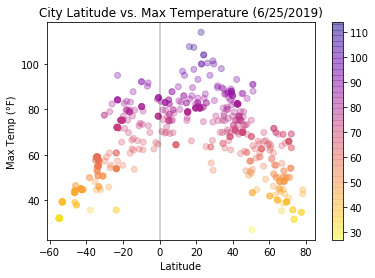

In [8]:
# format today's date
today = f"{dt.now().date().month}/{dt.now().date().day}/{dt.now().date().year}"

# temperature plot
x_temp = df["Latitude"]
y_temp = df["Max Temp (\u00b0F)"]
plt.scatter(x_temp, y_temp, c=y_temp, alpha=0.3, cmap=cm.plasma.reversed())
plt.colorbar()
plt.axvline(0, color="black", alpha=0.25)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (\u00b0F)")
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.savefig("Images/lat-temp-scatter.png")
plt.show()

#### Latitude vs Humidity Plot

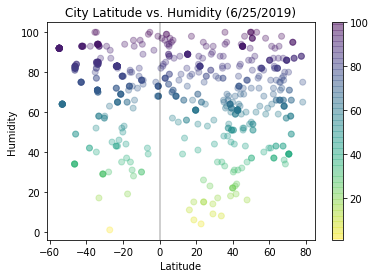

In [9]:
# humidity plot
x_humid = df["Latitude"]
y_humid = df["Humidity"]
plt.scatter(x_humid, y_humid, c=y_humid, alpha=0.3, cmap=cm.viridis.reversed())
plt.colorbar()
plt.axvline(0, color="black", alpha=0.25)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs. Humidity ({today})")
plt.savefig("Images/lat-humidity-scatter.png")
plt.show()

#### Latitude vs Cloudiness Plot

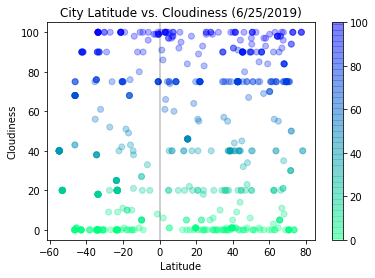

In [10]:
# cloudiness plot
x_cloud = df["Latitude"]
y_cloud = df["Cloudiness"]
plt.scatter(x_cloud, y_cloud, c=y_cloud, alpha=0.3, cmap=cm.winter.reversed())
plt.colorbar()
plt.axvline(0, color="black", alpha=0.25)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.savefig("Images/lat-cloudiness-scatter.png")
plt.show()

#### Latitude vs Wind Speed Plot

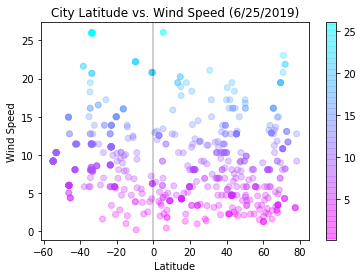

In [11]:
# wind speed plot
x_wind = df["Latitude"]
y_wind = df["Wind Speed"]
plt.scatter(x_wind, y_wind, c=y_wind, alpha=0.3, cmap=cm.cool.reversed())
plt.colorbar()
plt.axvline(0, color="black", alpha=0.25)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.savefig("Images/lat-windspeed-scatter.png")
plt.show()